<a href="https://colab.research.google.com/github/PriKishi/Computer-Vision/blob/main/Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation



1. Load the dataset: Read the images from the train, test, and predict folders.
2. Split the training data: Split the train data into training and validation sets (e.g.,
80% training, 20% validation).
3. Data Augmentation: Apply data augmentation techniques to increase the diversity of
your training data (e.g., rotations, flips, zooms)

In [ ]:
#Import libraries to read images of data set and folders
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The images are in a folder named 'My_data'
train_folder = '/content/drive/MyDrive/Colab Notebooks/Computer vision/MY_data/train'

In [ ]:
# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(train_folder))
print(classes)

['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


**Set up the Framework**
I'm going to use Keras ML framework

**Split the training data:** Split the train data into training and validation sets (e.g., 80% training, 20% validation).

**Data Augmentation:** Adding Data Augmentation to increase the diversity of the training data to
enhance the robustness of the model.

In [ ]:
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size

batch_size = 30
img_size = (128, 128)


print("Getting Data...")
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2,  # Hold back 20% of the images for validation
    # Data augmentation parameters
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    train_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    train_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 1841 images belonging to 10 classes.
Preparing validation dataset...
Found 460 images belonging to 10 classes.


**Batches 30:** It strikes a balance between efficient use of computational resources and the stability of gradient updates.

**Img size:** Common sizes like (128, 128) or (224, 224) are typically used. Ensure that the chosen size retains enough detail for distinguishing different fruits

**Data Aug:** To increase the diversity of the training data. This helps to improve the robustness of the model

**Validation Split 20%:** This split is appropriate for evaluating the model's performance and preventing overfitting. It’s a common practice to use 20% for validation.

**rescale=1./255**:Standard approach and should be included to ensure that the model converges well during training.

# Custom Neural Network





1. Architecture: Design a custom neural network suitable for image classification.
2. Compile the model: Choose an appropriate loss function, optimizer, and metrics.
3. Train the model: Experiment with different learning rates, batch sizes, and
optimization methods (e.g., SGD, Adam).
4. Evaluate the model: Evaluate the performance of your model on the validation and
test sets.
5. Record the results: Document the performance metrics and any observations.

In [ ]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras import optimizers
import tensorflow as tf

In [ ]:
# Define the image size and number of categories
img_size = (128, 128)  # Adjust based on your dataset
num_categories = 10  # Fruit categories

# Building the model
model = Sequential()

# Input layer
model.add(tf.keras.layers.Input(shape=(img_size[0], img_size[1], 3)))  # RGB images have 3 channels

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization

# Fully connected layer 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization

# Output layer
model.add(Dense(num_categories, activation='softmax'))  # Use softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

### Archutecture

**Three Convolutional Layers:** Increasing complexity with each layer (32, 64, 128 filters).
As you stack more layers, the computational complexity grows rapidly.

**Benefits of multiple Convolutional layers:**


*   Dimensionality Reduction and Computational Efficiency
*   Focus on Important Features
*   Prevent Overfitting
*   Hierarchical Feature Learning
*   Translation Invariance
*   Effective Network Depth


**MaxPooling Layers:** After each convolutional layer to reduce the spatial dimensions. This reduction lowers the number of parameters in the subsequent layers and decreases the amount of computation required, making the network more efficient and faster to train.

**Flatten Layer:** To convert the 2D output from the convolutional layers into 1D.

**Fully Connected Layers:** Two dense layers with dropout for regularization.

**Output Layer:** A dense layer with softmax activation for multi-class classification.

### Some insights

Using three convolutional layers with increasing complexity (32, 64, 128 filters) provides a powerful framework for capturing hierarchical and diverse features from input data. This design allows for efficient use of parameters, improved computational efficiency, better feature diversity, and enhanced generalization. It enables the network to progressively learn and refine features, leading to robust and accurate performance in complex tasks like image recognition and classification.

Pooling layers, especially max pooling, are fundamental to CNNs because they help reduce the spatial dimensions of the data while preserving essential features. This reduction leads to lower computational requirements, better generalization, hierarchical feature extraction, and more robust models.

**Analysis**

The model is complex with three convolutional layers, each increasing in the number of filters. This allows it to capture more intricate patterns in the data but also requires more computational resources.

The model has 4,296,586 parameters, which means it has a higher capacity to learn complex patterns but also a higher risk of overfitting

It might overfit if the dataset is not large enough or if there isn't enough regularization, as it has a high number of parameters.

`This model is suitable if:`


*   The dataset is large and complex, requiring a model with high capacity to capture detailed patterns.
*   If there is enough computational resources and are implementing techniques to mitigate overfitting, like data augmentation and dropout.





## Train the Model

## Model 1








**Monitor Validation Performance**

The goal is to train the model until it achieves good performance on the validation data without overfitting. The validation loss or accuracy should stabilize or start to diverge after a certain number of epochs.

**Use Early Stopping:**
Early stopping helps to automatically stop training when the model's performance on the validation set starts to degrade. This prevents overfitting and reduces training time.


**Initial Range for Epochs:**

I have decided to start with 5 epochs to see how the model's performance trends.
Nevertheless, I will monitor the performance after each epoch and decide if need more or fewer epochs based on the trend of the loss and accuracy.

**Learning Rate Adjustments:**

Sometimes, training for more epochs with a reducing learning rate can lead to better performance. Might need to consider using learning rate schedules or decays if the model is not converging well.

**Compute Resources:**

Keep in mind the computational resources and time you have available. Training for too many epochs unnecessarily can be resource-intensive.
Practical Steps to Determine the Optimal Number of Epochs:

**Evaluate the Model:**

After the initial training, evaluate the model's performance on the validation set. Check if the validation loss or accuracy is still improving or if it has started to plateau or degrade.

**Adjust Based on Observations:**



*   If the model is still improving, increase the number of epochs.
*   If the model starts overfitting (validation performance worsens while training performance improves), thes best is to reduce the epochs and rely on early stopping to halt training at the right time.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5,  # Start with a low number
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/5
61/61 [==============================] - 715s 12s/step - loss: 2.3360 - accuracy: 0.1071 - val_loss: 2.2618 - val_accuracy: 0.1578
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - 20s 333ms/step - loss: 2.2093 - accuracy: 0.1761 - val_loss: 2.1110 - val_accuracy: 0.2067
Epoch 3/5
61/61 [==============================] - 21s 345ms/step - loss: 2.0957 - accuracy: 0.1944 - val_loss: 1.9540 - val_accuracy: 0.2556
Epoch 4/5
61/61 [==============================] - 21s 346ms/step - loss: 2.0565 - accuracy: 0.2027 - val_loss: 1.9194 - val_accuracy: 0.2533
Epoch 5/5
61/61 [==============================] - 20s 322ms/step - loss: 1.9443 - accuracy: 0.2209 - val_loss: 1.7606 - val_accuracy: 0.3000


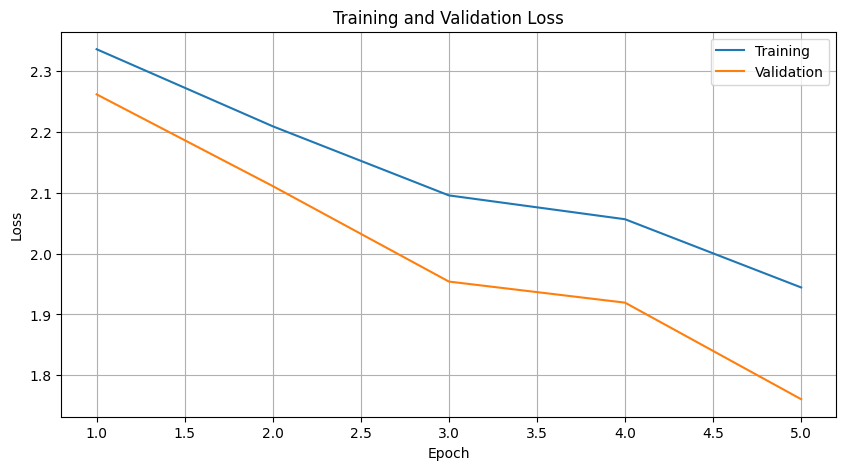

In [ ]:
# Plotting Training and Validation Loss
# Tracked average training and validation loss history for each epoch.
# We can plot these to verify that loss reduced as the model was trained, and to detect
# over-fitting (which is indicated by a continued drop in training loss after
# validation loss has levelled out or started to increase.

import matplotlib.pyplot as plt

num_epochs_trained = len(history.history['loss'])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs_trained + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs_trained + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # iterate with a higher epoch to improve results
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
61/61 [==============================] - 22s 354ms/step - loss: 1.8420 - accuracy: 0.2419 - val_loss: 1.7335 - val_accuracy: 0.3156
Epoch 2/10
61/61 [==============================] - 21s 349ms/step - loss: 1.7586 - accuracy: 0.2728 - val_loss: 1.6011 - val_accuracy: 0.3711
Epoch 3/10
61/61 [==============================] - 20s 322ms/step - loss: 1.7630 - accuracy: 0.2590 - val_loss: 1.5806 - val_accuracy: 0.3667
Epoch 4/10
61/61 [==============================] - 21s 347ms/step - loss: 1.7198 - accuracy: 0.2954 - val_loss: 1.6063 - val_accuracy: 0.3578
Epoch 5/10
61/61 [==============================] - 19s 310ms/step - loss: 1.7248 - accuracy: 0.2927 - val_loss: 1.5775 - val_accuracy: 0.3689
Epoch 6/10
61/61 [==============================] - 21s 344ms/step - loss: 1.6920 - accuracy: 0.3131 - val_loss: 1.5783 - val_accuracy: 0.3911
Epoch 7/10
61/61 [==============================] - 21s 352ms/step - loss: 1.6831 - accuracy: 0.3219 - val_loss: 1.5291 - val_accuracy: 0.4000

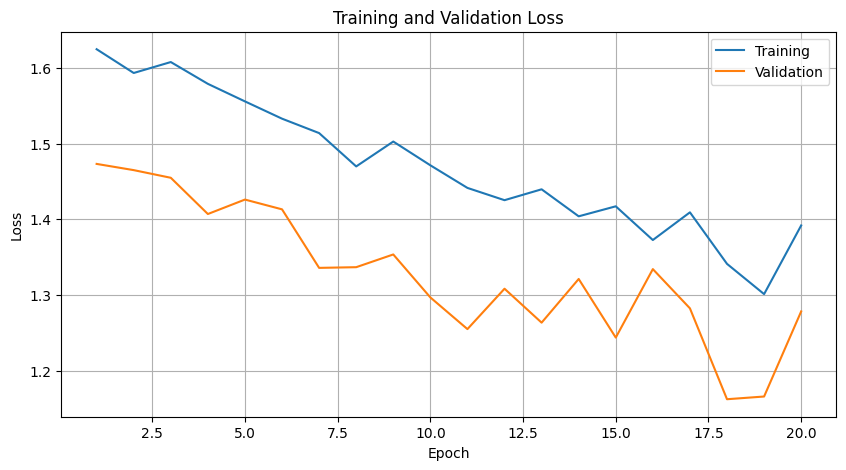

In [ ]:
#Plot

import matplotlib.pyplot as plt

num_epochs_trained = len(history.history['loss'])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs_trained + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs_trained + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

The training and validation loss curves show a decreasing trend, which is good. It indicates that the model is learning and improving over time.
The validation loss curve is also decreasing, which means the model generalizes well to unseen data without overfitting.
The loss curves for both training and validation follow a similar pattern, which suggests that the training is proceeding as expected.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,  # iterate with a higher epoch to improve results
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
61/61 [==============================] - 22s 355ms/step - loss: 1.6244 - accuracy: 0.3512 - val_loss: 1.4731 - val_accuracy: 0.4089
Epoch 2/20
61/61 [==============================] - 21s 338ms/step - loss: 1.5930 - accuracy: 0.3595 - val_loss: 1.4649 - val_accuracy: 0.4111
Epoch 3/20
61/61 [==============================] - 31s 519ms/step - loss: 1.6075 - accuracy: 0.3650 - val_loss: 1.4549 - val_accuracy: 0.3911
Epoch 4/20
61/61 [==============================] - 21s 342ms/step - loss: 1.5787 - accuracy: 0.3832 - val_loss: 1.4071 - val_accuracy: 0.4511
Epoch 5/20
61/61 [==============================] - 24s 398ms/step - loss: 1.5556 - accuracy: 0.3948 - val_loss: 1.4261 - val_accuracy: 0.4422
Epoch 6/20
61/61 [==============================] - 21s 352ms/step - loss: 1.5328 - accuracy: 0.4092 - val_loss: 1.4132 - val_accuracy: 0.4267
Epoch 7/20
61/61 [==============================] - 27s 438ms/step - loss: 1.5138 - accuracy: 0.4186 - val_loss: 1.3360 - val_accuracy: 0.5044

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,  # iterate with a higher epoch to improve results
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
61/61 [==============================] - 20s 330ms/step - loss: 1.3324 - accuracy: 0.4959 - val_loss: 1.1067 - val_accuracy: 0.6044
Epoch 2/20
61/61 [==============================] - 19s 309ms/step - loss: 1.2914 - accuracy: 0.5290 - val_loss: 1.1498 - val_accuracy: 0.5800
Epoch 3/20
61/61 [==============================] - 20s 326ms/step - loss: 1.2862 - accuracy: 0.5389 - val_loss: 1.1429 - val_accuracy: 0.6044
Epoch 4/20
61/61 [==============================] - 29s 475ms/step - loss: 1.3524 - accuracy: 0.5104 - val_loss: 1.1818 - val_accuracy: 0.5622
Epoch 5/20
61/61 [==============================] - 22s 356ms/step - loss: 1.3073 - accuracy: 0.5146 - val_loss: 1.1137 - val_accuracy: 0.6156
Epoch 6/20
61/61 [==============================] - 21s 346ms/step - loss: 1.3076 - accuracy: 0.5262 - val_loss: 1.1344 - val_accuracy: 0.6111


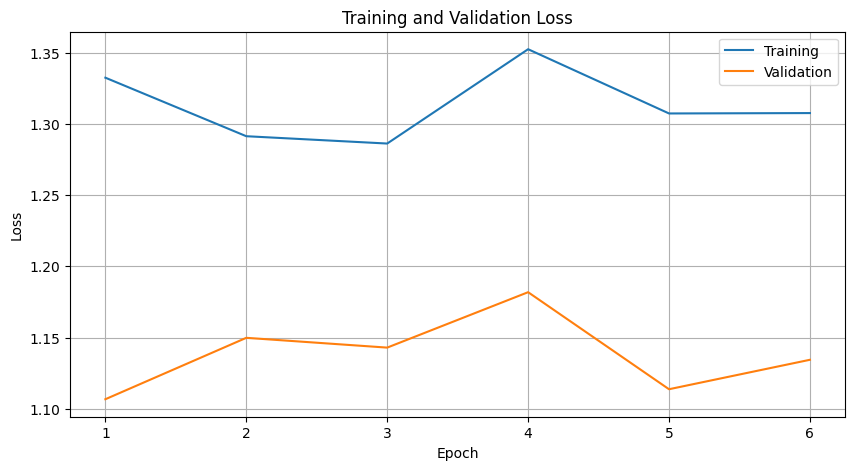

In [ ]:
#Plot

import matplotlib.pyplot as plt

num_epochs_trained = len(history.history['loss'])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs_trained + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs_trained + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

### Evaluation of Model 1





Generating predictions from validation data...
1/1 [==============================] - 0s 372ms/step


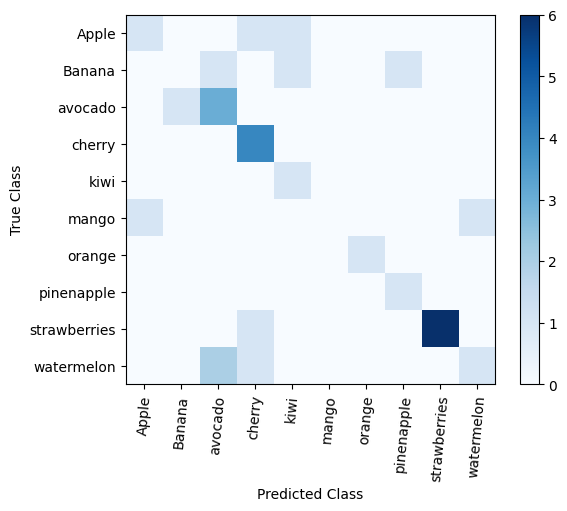

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Model 2



The objective of this second model is to play around with different hyperparametors and compare between both models

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define image size and batch size
batch_size = 30
img_size = (128, 128)
training_folder = '/content/gdrive/MyDrive/Colab Notebooks/Computer vision/MY_data/train'  # Update this path to your dataset folder

# Adding Data Augmentation to increase the diversity of the training data
# and enhance the robustness of your model.
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2,  # Hold back 20% of the images for validation
    # Data augmentation parameters
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Prepare the training dataset
train_generator = datagen.flow_from_directory(
    training_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # set as training data
)

# Prepare the validation dataset
validation_generator = datagen.flow_from_directory(
    training_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # set as validation data
)

# Define a simple Convolutional Neural Network model
model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)))

# Adding convolutional and pooling layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.


Epoch 1/10
61/61 [==============================] - 23s 343ms/step - loss: 2.2996 - accuracy: 0.1182 - val_loss: 2.1393 - val_accuracy: 0.2689 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
61/61 [==============================] - 21s 339ms/step - loss: 2.0628 - accuracy: 0.2264 - val_loss: 1.9052 - val_accuracy: 0.2867 - lr: 0.0010
Epoch 3/10
61/61 [==============================] - 20s 326ms/step - loss: 1.9297 - accuracy: 0.2490 - val_loss: 1.6984 - val_accuracy: 0.3133 - lr: 0.0010
Epoch 4/10
61/61 [==============================] - 21s 345ms/step - loss: 1.8416 - accuracy: 0.2529 - val_loss: 1.6655 - val_accuracy: 0.3556 - lr: 0.0010
Epoch 5/10
61/61 [==============================] - 21s 345ms/step - loss: 1.8005 - accuracy: 0.2722 - val_loss: 1.6194 - val_accuracy: 0.3644 - lr: 0.0010
Epoch 6/10
61/61 [==============================] - 20s 337ms/step - loss: 1.7605 - accuracy: 0.2949 - val_loss: 1.5772 - val_accuracy: 0.3978 - lr: 0.0010
Epoch 7/10
61/61 [==============================] - 21s 338ms/step - loss: 1.7520 - accuracy: 0.2866 - val_loss: 1.5791 - val_accuracy: 0.3733 - lr: 0.0010
Epoch 8/10
61/61 [==============================] - 19s 314ms/st

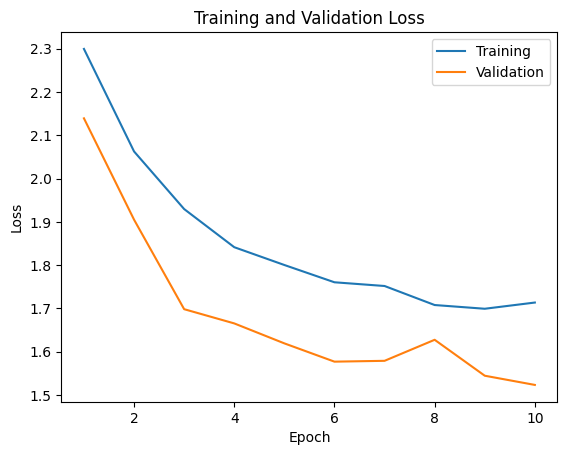

In [ ]:
# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Start with a moderate number, you can adjust based on your needs
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Plotting training and validation loss
import matplotlib.pyplot as plt

# Extracting history data
epoch_nums = range(1, len(history.history['loss']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss
plt.plot(epoch_nums, training_loss, label='Training')
plt.plot(epoch_nums, validation_loss, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### Evaluation Model 2

Generating predictions from validation data...
1/1 [==============================] - 0s 478ms/step


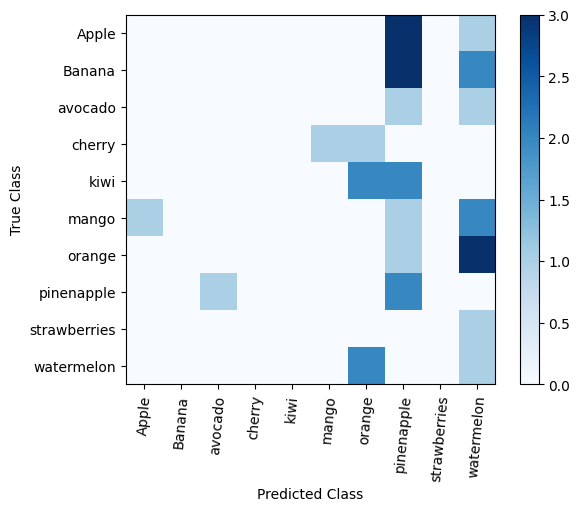

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## Comparing Models



**First previous model:**

Training Loss: Decreases rapidly in the first few epochs and then slows down.
Validation Loss: Decreases similarly and stays lower than the training loss throughout the 5 epochs.
Gap: There’s a noticeable gap, but the validation loss is consistently lower than the training loss, which is a positive sign indicating the model is performing well on validation data.

**This second model:**

Training Loss: Decreases consistently over 10 epochs, suggesting the model is learning.
Validation Loss: Decreases steadily and is lower than the training loss by the end of 10 epochs.
Gap: The gap between training and validation loss is relatively small, which indicates good generalization.

**Conclusion**


Both models are showing good training and validation loss trends. However, the second model has been trained for more epochs and shows a steady decrease in both losses without overfitting signs, making it a strong candidate.
The first model, though trained for fewer epochs, shows a faster decrease in losses and the validation loss is consistently lower than the training loss.


## Next Steps



Keep training both models to minimize both training and validation loss over epochs.

Look for signs of overfitting where the training loss continues to decrease, but the validation loss stops decreasing or increases

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15,  # iterate with a higher epoch to improve results
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
61/61 [==============================] - 21s 348ms/step - loss: 1.6445 - accuracy: 0.3440 - val_loss: 1.5072 - val_accuracy: 0.4044
Epoch 2/15
61/61 [==============================] - 20s 332ms/step - loss: 1.6116 - accuracy: 0.3738 - val_loss: 1.4437 - val_accuracy: 0.4556
Epoch 3/15
61/61 [==============================] - 20s 335ms/step - loss: 1.6040 - accuracy: 0.3860 - val_loss: 1.4750 - val_accuracy: 0.4378
Epoch 4/15
61/61 [==============================] - 20s 332ms/step - loss: 1.5701 - accuracy: 0.3760 - val_loss: 1.4528 - val_accuracy: 0.4333
Epoch 5/15
61/61 [==============================] - 21s 348ms/step - loss: 1.5528 - accuracy: 0.4009 - val_loss: 1.4082 - val_accuracy: 0.4711
Epoch 6/15
61/61 [==============================] - 21s 338ms/step - loss: 1.5512 - accuracy: 0.3981 - val_loss: 1.4816 - val_accuracy: 0.3978
Epoch 7/15
61/61 [==============================] - 21s 339ms/step - loss: 1.4883 - accuracy: 0.4086 - val_loss: 1.4301 - val_accuracy: 0.4356

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,  # iterate with a higher epoch to improve results
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
61/61 [==============================] - 22s 361ms/step - loss: 1.4928 - accuracy: 0.4451 - val_loss: 1.3432 - val_accuracy: 0.4689
Epoch 2/20
61/61 [==============================] - 26s 427ms/step - loss: 1.4286 - accuracy: 0.4688 - val_loss: 1.3138 - val_accuracy: 0.5156
Epoch 3/20
61/61 [==============================] - 18s 302ms/step - loss: 1.3824 - accuracy: 0.4815 - val_loss: 1.3794 - val_accuracy: 0.5022
Epoch 4/20
61/61 [==============================] - 20s 329ms/step - loss: 1.4100 - accuracy: 0.4793 - val_loss: 1.3182 - val_accuracy: 0.5044
Epoch 5/20
61/61 [==============================] - 19s 318ms/step - loss: 1.3954 - accuracy: 0.4821 - val_loss: 1.2767 - val_accuracy: 0.5244
Epoch 6/20
61/61 [==============================] - 19s 304ms/step - loss: 1.3511 - accuracy: 0.5047 - val_loss: 1.2478 - val_accuracy: 0.5133
Epoch 7/20
61/61 [==============================] - 20s 336ms/step - loss: 1.3078 - accuracy: 0.5312 - val_loss: 1.1797 - val_accuracy: 0.5822

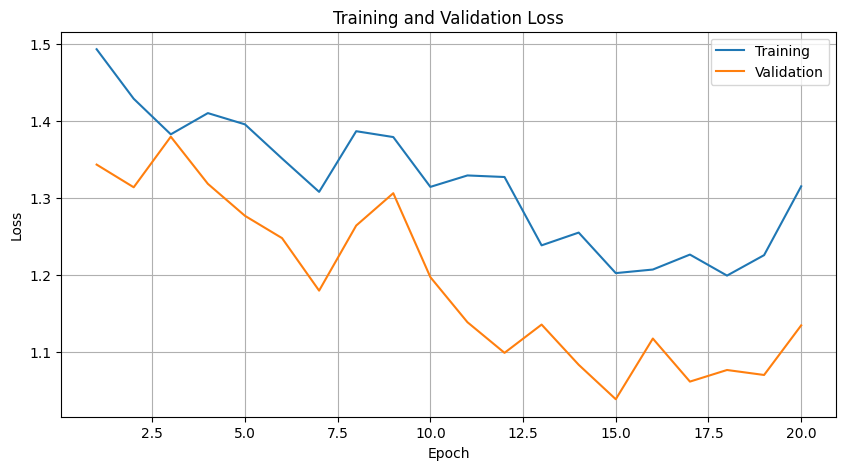

In [ ]:
#Plot

import matplotlib.pyplot as plt

num_epochs_trained = len(history.history['loss'])

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs_trained + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs_trained + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

**First previous model:**

Training Loss: Decreases rapidly in the first few epochs and then slows down.
Validation Loss: Decreases similarly and stays lower than the training loss throughout the 5 epochs.
Gap: There’s a noticeable gap, but the validation loss is consistently lower than the training loss, which is a positive sign indicating the model is performing well on validation data.

**This second model:**

Training Loss: Decreases consistently over 10 epochs, suggesting the model is learning.
Validation Loss: Decreases steadily and is lower than the training loss by the end of 10 epochs.
Gap: The gap between training and validation loss is relatively small, which indicates good generalization.

**Conclusion**


Both models are showing good training and validation loss trends. However, the second model has been trained for more epochs and shows a steady decrease in both losses without overfitting signs, making it a strong candidate.
The first model, though trained for fewer epochs, shows a faster decrease in losses and the validation loss is consistently lower than the training loss.


## Save the model

In [ ]:
from keras.models import load_model

modelFileName = 'shape-classifier.h5'

model.save(modelFileName) # saves the trained model
print("Model saved.")

del model  # deletes the existing model variable

Model saved.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Use the Model with New Data

In [ ]:
import os
from random import randint
import numpy as np
from PIL import Image
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"):
    from PIL import Image

    # rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.ANTIALIAS)

    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    # return the resized image
    return new_image

# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np

    # We need to format the input to match the training data
    # The data generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    img_features = image_array.astype('float32')
    img_features /= 255

    # These are the classes our model can predict
    classes = ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']

    # Predict the class of each input image
    predictions = classifier.predict(img_features)

    predicted_classes = []
    for prediction in predictions:
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(classnames[int(class_idx)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


# Transfer Learning

1. Choose pre-trained models: Select at least two pre-trained models (e.g., VGG16,
ResNet50, MobileNet).
2. Fine-tune the models: Replace the top layer(s) of the pre-trained models with layers
suitable for your classification task.
3. Compile the models: Choose appropriate loss functions, optimizers, and metrics.
4. Train the models: Fine-tune the pre-trained models on your dataset. Experiment with
different hyperparameters.
5. Evaluate the models: Assess the performance on the validation and test sets.
6. Record the results

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

#print('Keras version:',keras.__version__)

from keras import Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# The images are in a folder named 'MY_data'
training_folder = '/content/drive/MyDrive/Colab Notebooks/Computer vision/MY_data/train'

In [ ]:
# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder))
print(classes)

['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


In [ ]:
# The images are in a folder named 'MY_data'
training_folder = '/content/drive/MyDrive/Colab Notebooks/Computer vision/MY_data/train'

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder))
print(classes)

# Our source images are 128x128, but the base model we're going to use was trained with 224x224 images
pretrained_size = (224,224)
batch_size = 15

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder,
    target_size=pretrained_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder,
    target_size=pretrained_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']
Getting Data...
Preparing training dataset...
Found 1611 images belonging to 10 classes.
Preparing validation dataset...
Found 690 images belonging to 10 classes.


## VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
#Load the base model, not including its final connected layer, and set the input shape to match our images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)

58889256/58889256 [==============================] - 0s 0us/step


### Fine Tune

Fine-tune the models: Replace the top layer(s) of the pre-trained models with layers
suitable for your classification task.

In [ ]:
# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create layers for classification of our images
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # Add a dense layer with 256 units to provide more capacity for learning complex patterns specific to your dataset.
x = Dropout(0.5)(x)  # Add Dropout to prevent overfitting
x = Dense(128, activation='relu')(x)  # Add another dense layer with 128 units
x = Dropout(0.5)(x)  # Add another Dropout

prediction_layer = Dense(len(classes), activation='softmax')(x)  # Final output layer for classification
model = Model(inputs=base_model.input, outputs=prediction_layer)

# Compile the model
opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Now print the full model, which will include the layers of the base model plus the dense layer we added
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Train the model over 1 epoch using 15-image batches and using the validation holdout dataset for validation
num_epochs = 1
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

<ipython-input-44-a6f4a8d955fd>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


107/107 [==============================] - 4136s 39s/step - loss: 2.4230 - accuracy: 0.1021 - val_loss: 2.3027 - val_accuracy: 0.1000


### Evaluate and Recording Results with the Transfer Learning

In [ ]:
# Evaluate the model on the validation set
evaluation = model.evaluate_generator(validation_generator, steps=validation_generator.samples // batch_size)

# Extract evaluation metrics
validation_loss = evaluation[0]
validation_accuracy = evaluation[1]

# Record the results
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

<ipython-input-10-282ccea8bd71>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(validation_generator, steps=validation_generator.samples // batch_size)


Validation Loss: 2.6356968879699707
Validation Accuracy: 0.10289855301380157


### Improving the Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet50_best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/15
107/107 [==============================] - ETA: 0s - loss: 2.7837 - accuracy: 0.1234

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 1327s 12s/step - loss: 2.7837 - accuracy: 0.1234 - val_loss: 2.1930 - val_accuracy: 0.2217 - lr: 0.0010
Epoch 2/15
107/107 [==============================] - 1305s 12s/step - loss: 2.1530 - accuracy: 0.2099 - val_loss: 1.9378 - val_accuracy: 0.3681 - lr: 0.0010
Epoch 3/15
107/107 [==============================] - ETA: 0s - loss: 2.0232 - accuracy: 0.2638

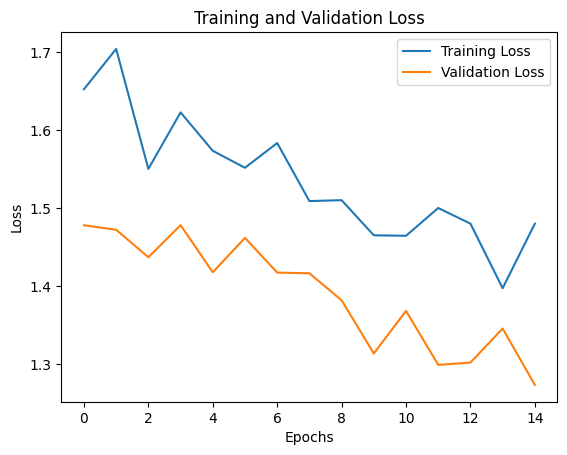

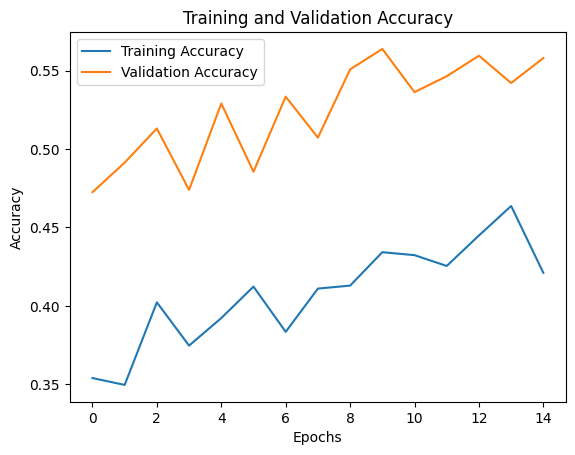

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

### Observations of the model

**Overall Performance**

Both loss and accuracy trends suggest that the model is improving with training. However, the presence of significant fluctuations indicates that there might be some room for tuning the training process to achieve more stable results.

The overall performance shows that the model has the potential for improvement but is on the right track with a noticeable decrease in loss and increase in accuracy.

**Next Step for Further Improvement**



1.   Increase Epochs
2.   Hyperparameter Tuning
3.   Data Augmentation
4.   Early Stopping
5.   Regularization Techniques
6.   Evaluate on Test Set






## MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
# Define constants
img_size = (128, 128)
batch_size = 32
num_classes = 10  # Update based on your dataset


In [ ]:
# Data preparation with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Computer vision/MY_data/test',  # Path to training data set
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Computer vision/MY_data/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 822 images belonging to 10 classes.
Found 203 images belonging to 10 classes.


In [ ]:
# Load MobileNet model without the top layer (include_top=False)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use global average pooling instead of flattening
x = Dense(1024, activation='relu')(x)  # Dense layer
x = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation

# Define the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

17225924/17225924 [==============================] - 1s 0us/step


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 64, 64, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 64, 64, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 64, 64, 32)        128 

Epoch 1/20
25/25 [==============================] - 437s 17s/step - loss: 1.3837 - accuracy: 0.5684 - val_loss: 1.0213 - val_accuracy: 0.6615 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - 23s 921ms/step - loss: 0.4974 - accuracy: 0.8405 - val_loss: 0.7216 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 3/20
25/25 [==============================] - 23s 912ms/step - loss: 0.3100 - accuracy: 0.9038 - val_loss: 0.6364 - val_accuracy: 0.7760 - lr: 0.0010
Epoch 4/20
25/25 [==============================] - 22s 882ms/step - loss: 0.2265 - accuracy: 0.9215 - val_loss: 0.7201 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 5/20
25/25 [==============================] - 24s 965ms/step - loss: 0.1845 - accuracy: 0.9456 - val_loss: 0.6174 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 6/20
25/25 [==============================] - 25s 971ms/step - loss: 0.2007 - accuracy: 0.9253 - val_loss: 0.6055 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 7/20
25/25 [==============================] - 22s 866ms/ste

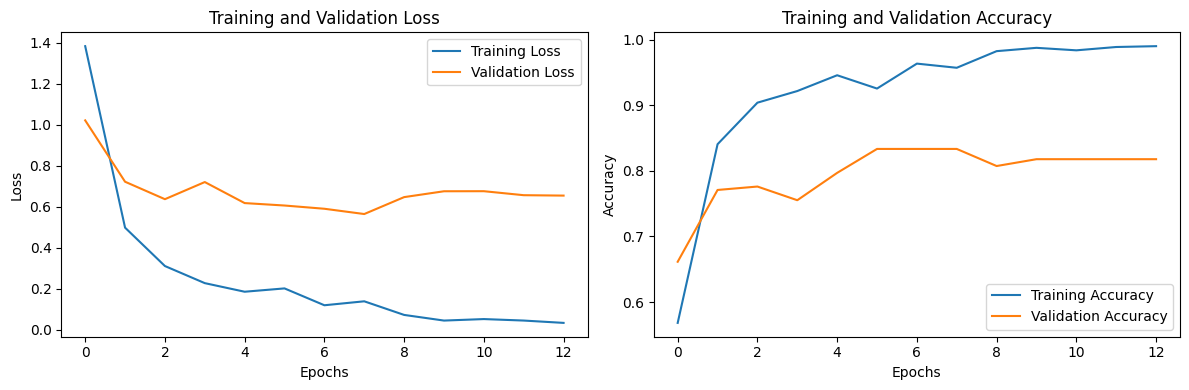

7/7 [==============================] - 6s 832ms/step - loss: 0.6221 - accuracy: 0.8325
Validation Loss: 0.6221244931221008
Validation Accuracy: 0.8325123190879822


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20,  # You can adjust the number of epochs based on your needs
    callbacks=[early_stopping, reduce_lr]
)

# Plot the training and validation metrics
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training_history(history)

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

# Prediction

1. Load the prediction data: Load images from the predict folder.
2. Generate predictions: Use the best-performing models to generate predictions for the
images in the predict folder.
3. Visualize predictions: Display the images along with their predicted labels.

## VGG16

<ipython-input-29-dd43f72fe918>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  src_img.thumbnail(size, Image.ANTIALIAS)


1/1 [==============================] - 2s 2s/step
Image: 147.jpeg
VGG16 Prediction: apple



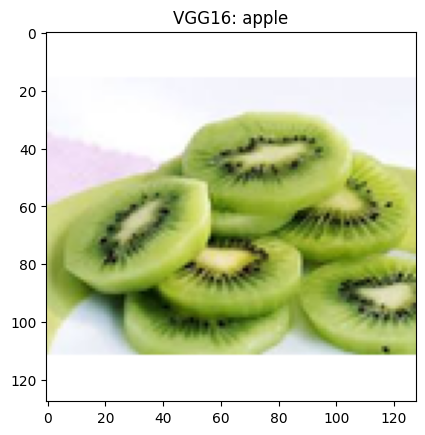

1/1 [==============================] - 0s 71ms/step
Image: 65.jpeg
VGG16 Prediction: strawberries



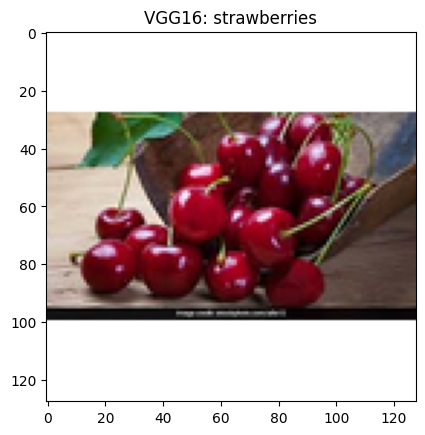

1/1 [==============================] - 0s 39ms/step
Image: 66.jpeg
VGG16 Prediction: pineapple



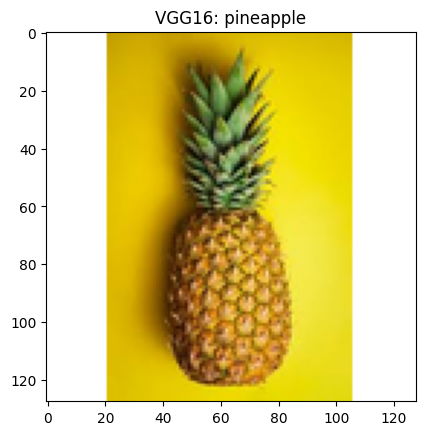

1/1 [==============================] - 0s 39ms/step
Image: img_341.jpeg
VGG16 Prediction: watermelon



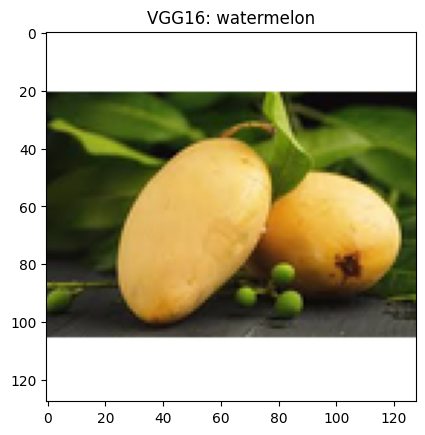

1/1 [==============================] - 0s 38ms/step
Image: 011.jpeg
VGG16 Prediction: strawberries



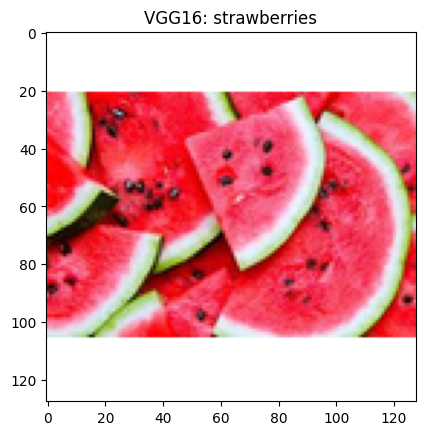

1/1 [==============================] - 0s 38ms/step
Image: f1.jpeg
VGG16 Prediction: strawberries



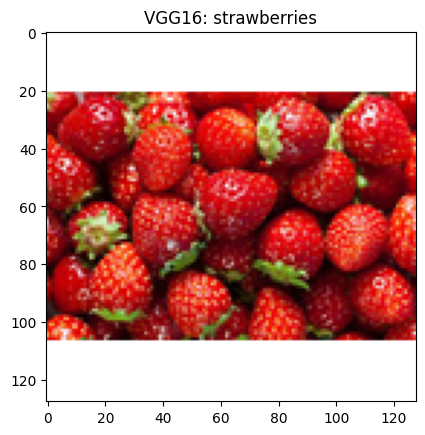

1/1 [==============================] - 0s 38ms/step
Image: img_361.jpeg
VGG16 Prediction: kiwi



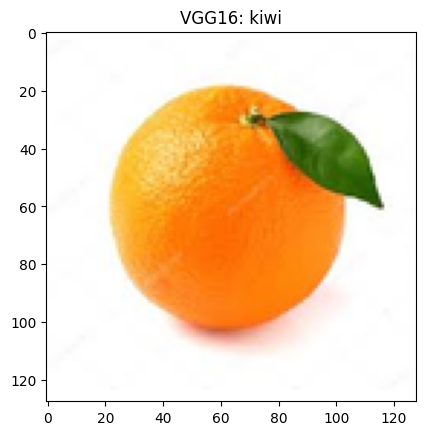

1/1 [==============================] - 0s 42ms/step
Image: 41.jpeg
VGG16 Prediction: strawberries



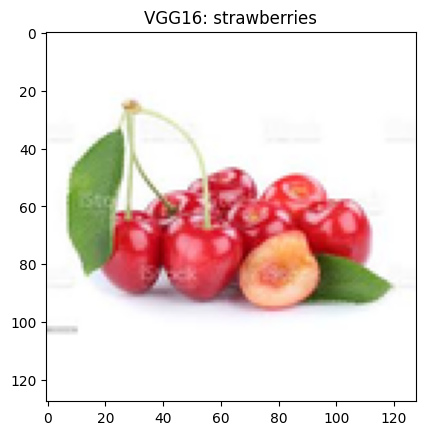

1/1 [==============================] - 0s 40ms/step
Image: 68.jpeg
VGG16 Prediction: cherry



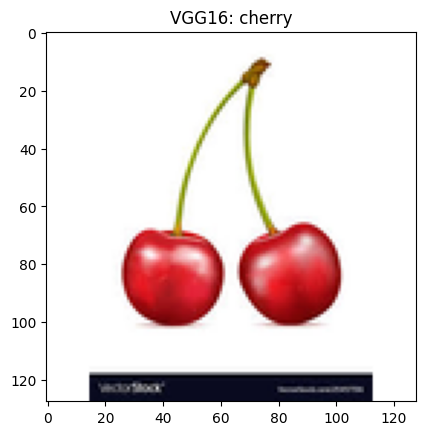

1/1 [==============================] - 0s 39ms/step
Image: f7.jpeg
VGG16 Prediction: strawberries



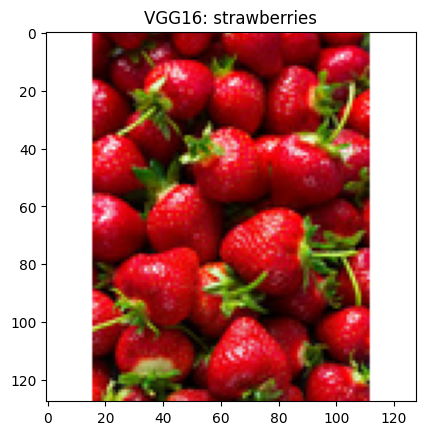

1/1 [==============================] - 0s 63ms/step
Image: 33.jpeg
VGG16 Prediction: pineapple



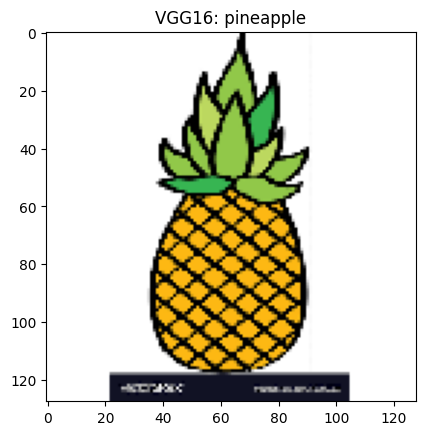

1/1 [==============================] - 0s 55ms/step
Image: img_371.jpeg
VGG16 Prediction: strawberries



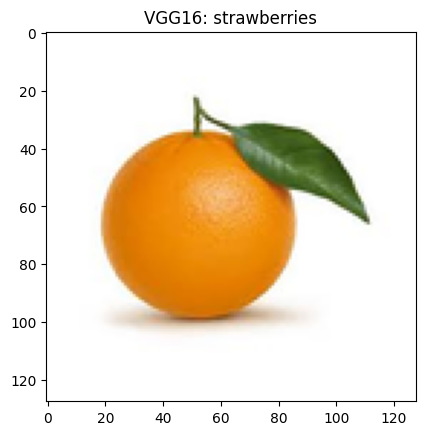

1/1 [==============================] - 0s 56ms/step
Image: 659.jpeg
VGG16 Prediction: apple



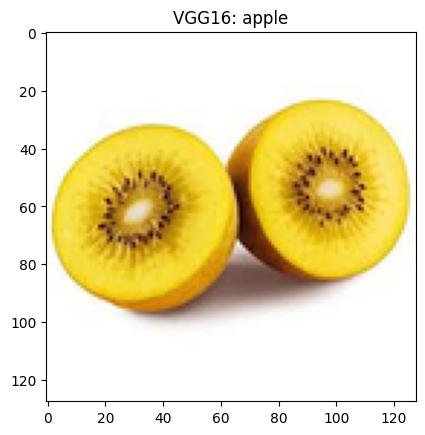

1/1 [==============================] - 0s 59ms/step
Image: 012.jpeg
VGG16 Prediction: strawberries



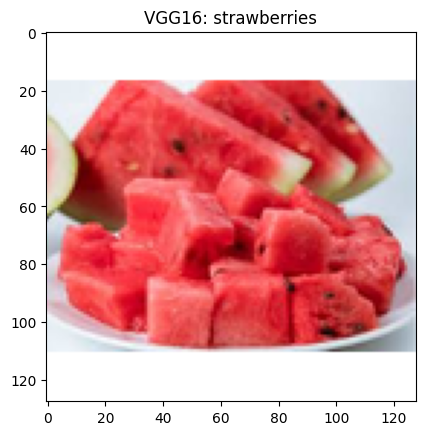

1/1 [==============================] - 0s 38ms/step
Image: img_381.jpeg
VGG16 Prediction: orange



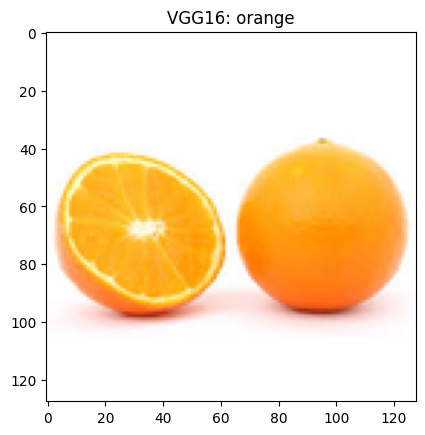

1/1 [==============================] - 0s 37ms/step
Image: f5.jpeg
VGG16 Prediction: strawberries



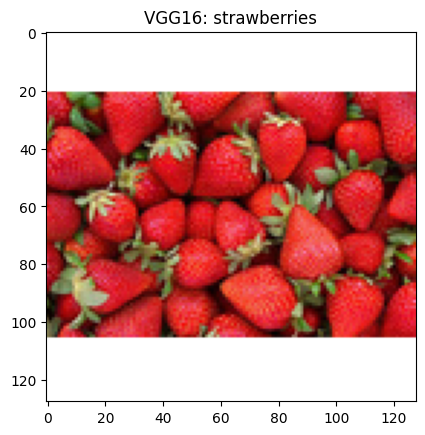

1/1 [==============================] - 0s 46ms/step
Image: 2.jpeg
VGG16 Prediction: orange



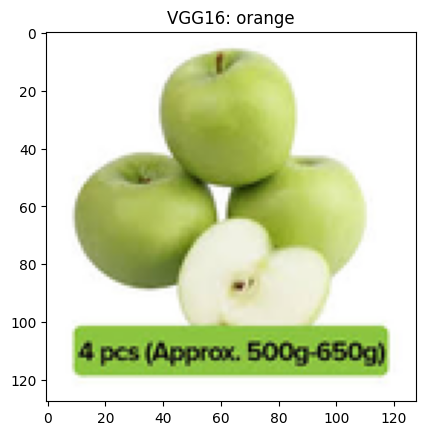

1/1 [==============================] - 0s 37ms/step
Image: 1.jpeg
VGG16 Prediction: strawberries



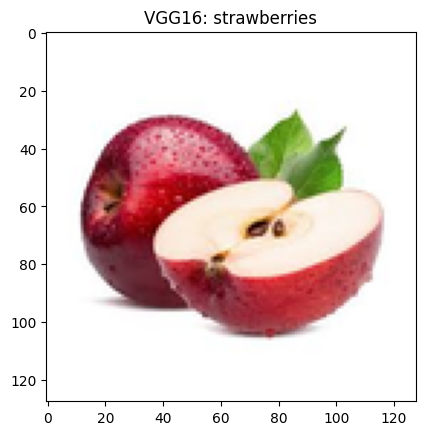

1/1 [==============================] - 0s 38ms/step
Image: img_41.jpeg
VGG16 Prediction: apple



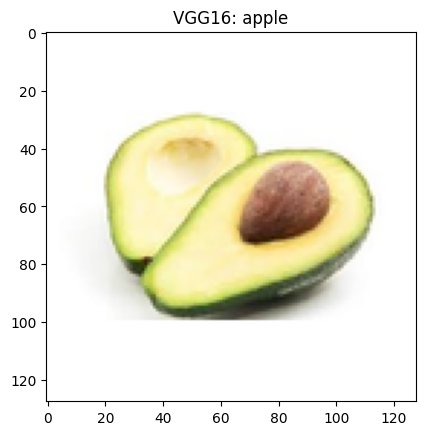

1/1 [==============================] - 0s 37ms/step
Image: 0124.jpeg
VGG16 Prediction: strawberries



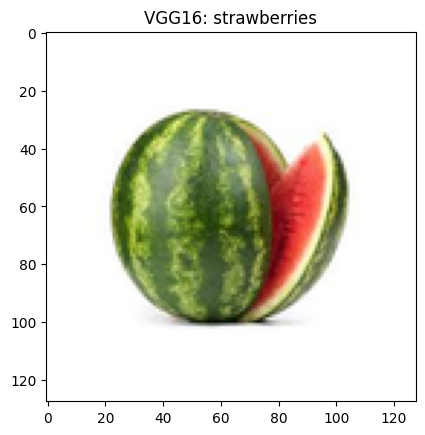

1/1 [==============================] - 0s 36ms/step
Image: 202.jpeg
VGG16 Prediction: apple



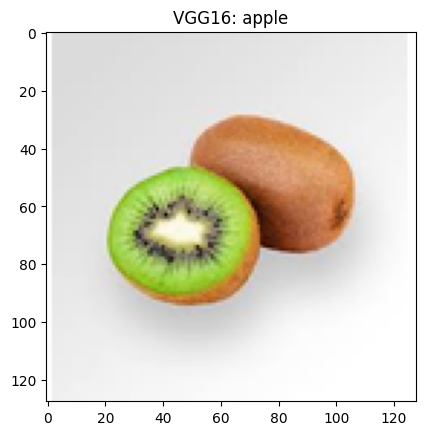

1/1 [==============================] - 0s 36ms/step
Image: 0122.jpeg
VGG16 Prediction: pineapple



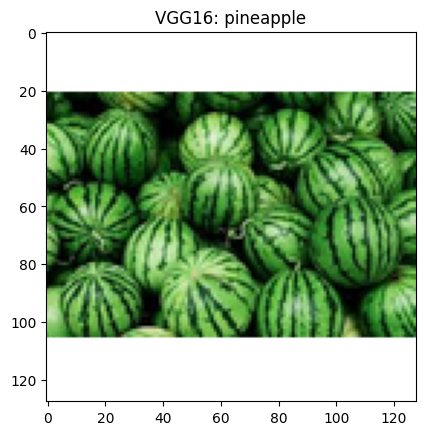

1/1 [==============================] - 0s 46ms/step
Image: img_21.jpeg
VGG16 Prediction: strawberries



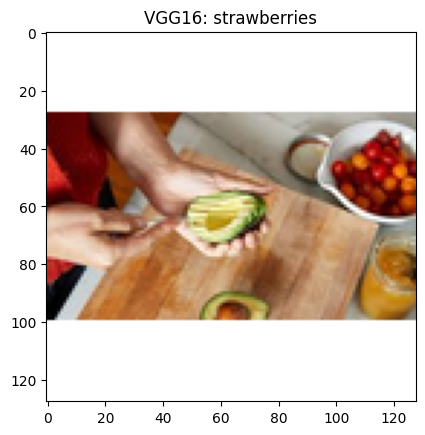

1/1 [==============================] - 0s 60ms/step
Image: 3.jpeg
VGG16 Prediction: strawberries



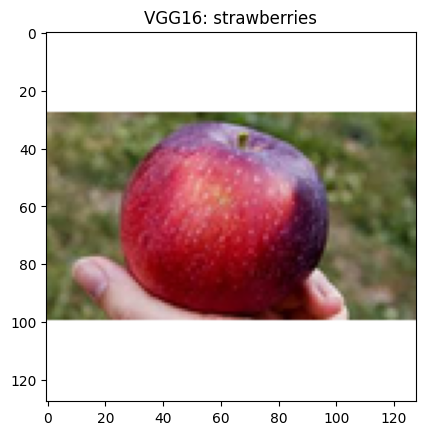

1/1 [==============================] - 0s 55ms/step
Image: img_11.jpeg
VGG16 Prediction: apple



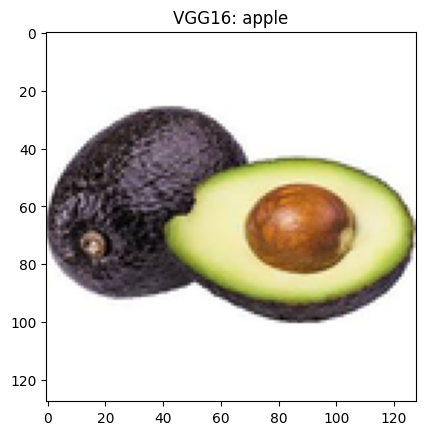

1/1 [==============================] - 0s 57ms/step
Image: img_241.jpeg
VGG16 Prediction: orange



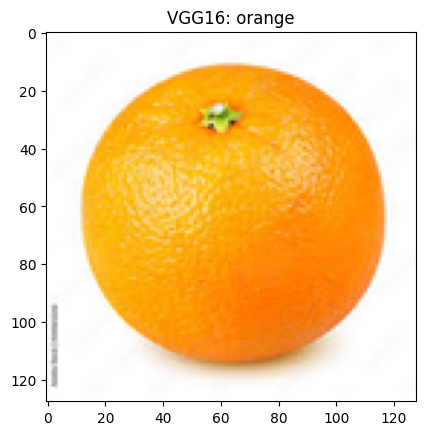

1/1 [==============================] - 0s 147ms/step
Image: 9.jpeg
VGG16 Prediction: pineapple



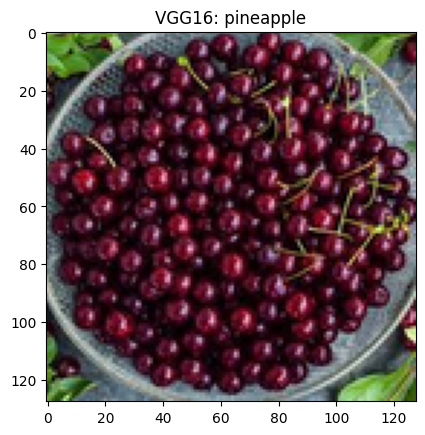

1/1 [==============================] - 0s 150ms/step
Image: img_141.jpeg
VGG16 Prediction: banana



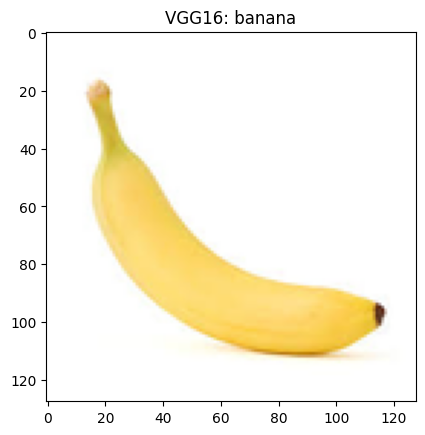

1/1 [==============================] - 0s 110ms/step
Image: img_421.jpeg
VGG16 Prediction: orange



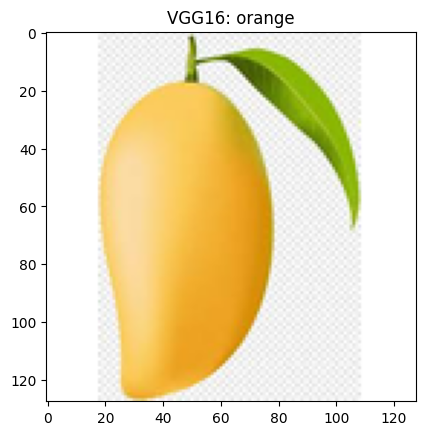

1/1 [==============================] - 0s 38ms/step
Image: 22.jpeg
VGG16 Prediction: pineapple



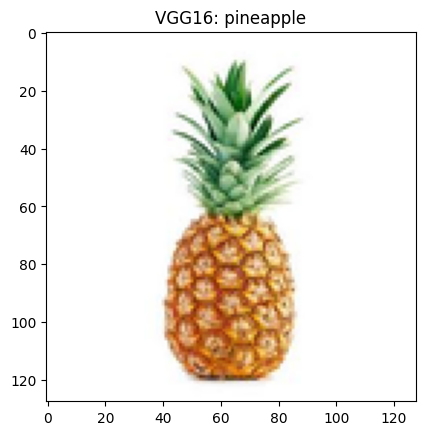

1/1 [==============================] - 0s 36ms/step
Image: img_01.jpeg
VGG16 Prediction: strawberries



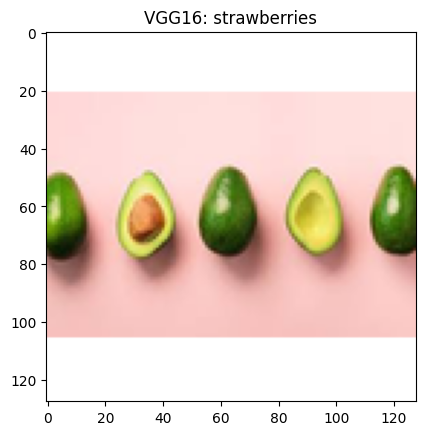

1/1 [==============================] - 0s 39ms/step
Image: 023.jpeg
VGG16 Prediction: apple



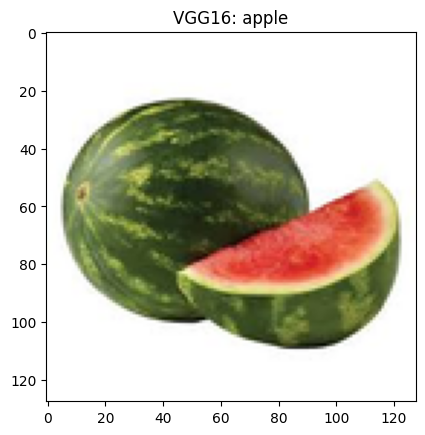

1/1 [==============================] - 0s 47ms/step
Image: img_401.jpeg
VGG16 Prediction: strawberries



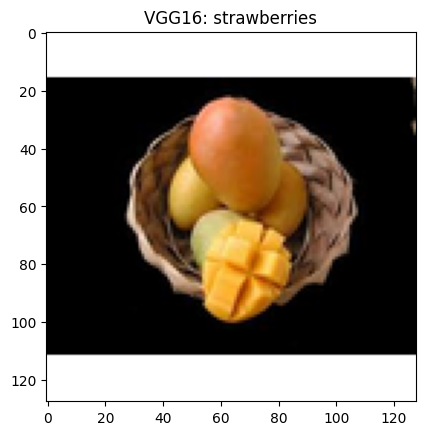

1/1 [==============================] - 0s 41ms/step
Image: 0.jpeg
VGG16 Prediction: strawberries



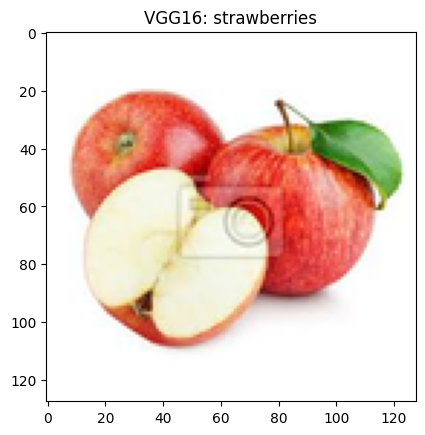

1/1 [==============================] - 0s 39ms/step
Image: f0.jpeg
VGG16 Prediction: orange



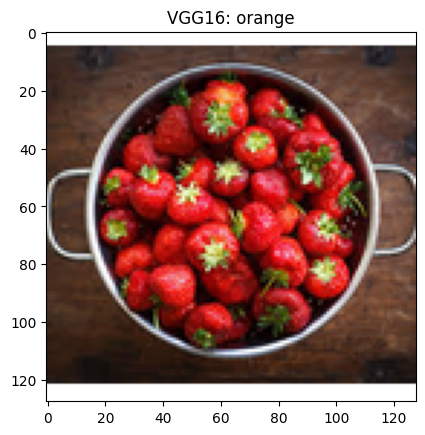

1/1 [==============================] - 0s 41ms/step
Image: 321.jpeg
VGG16 Prediction: strawberries



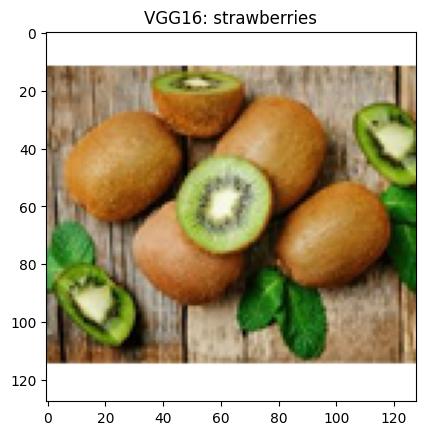

1/1 [==============================] - 0s 43ms/step
Image: img_411.jpeg
VGG16 Prediction: avocado



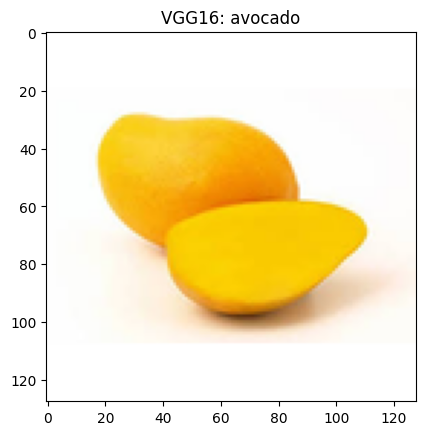

1/1 [==============================] - 0s 38ms/step
Image: 365.jpeg
VGG16 Prediction: strawberries



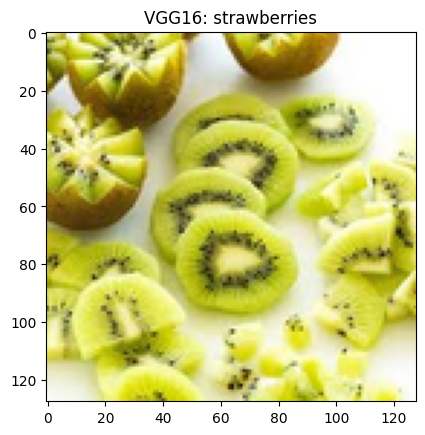

1/1 [==============================] - 0s 50ms/step
Image: 99.jpeg
VGG16 Prediction: pineapple



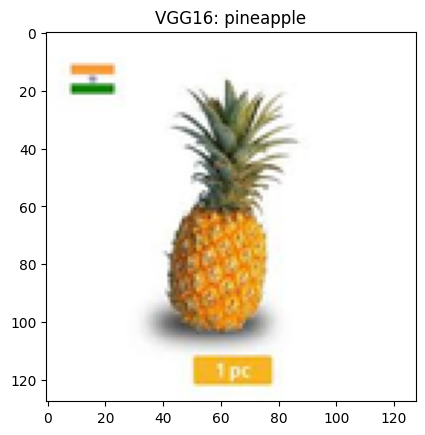

1/1 [==============================] - 0s 68ms/step
Image: img_121.jpeg
VGG16 Prediction: banana



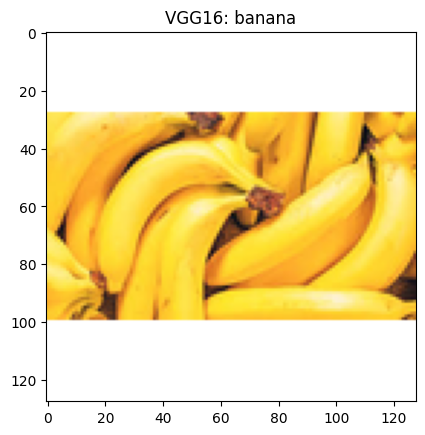

1/1 [==============================] - 0s 76ms/step
Image: img_171.jpeg
VGG16 Prediction: banana



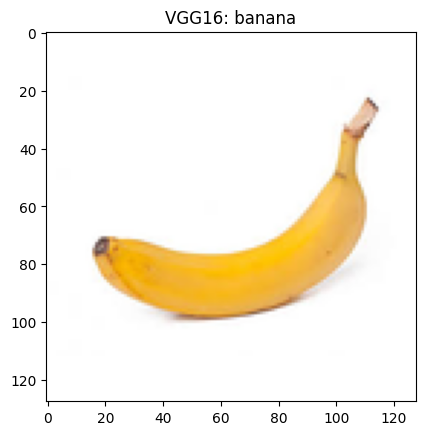

1/1 [==============================] - 0s 64ms/step
Image: 00.jpeg
VGG16 Prediction: strawberries



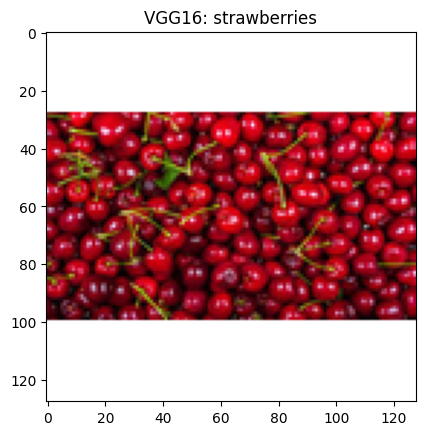

1/1 [==============================] - 0s 70ms/step
Image: img_301.jpeg
VGG16 Prediction: mango



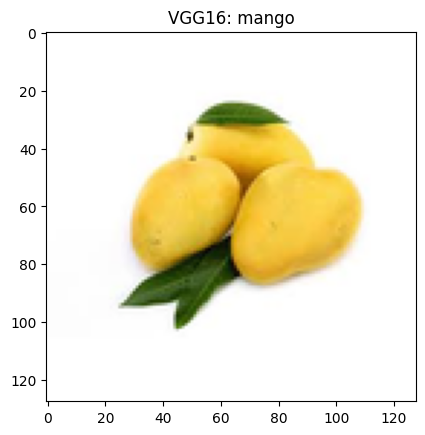

1/1 [==============================] - 0s 44ms/step
Image: f2.jpeg
VGG16 Prediction: strawberries



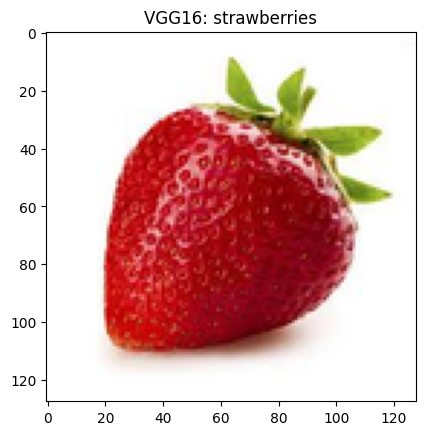

1/1 [==============================] - 0s 37ms/step
Image: img_31.jpeg
VGG16 Prediction: kiwi



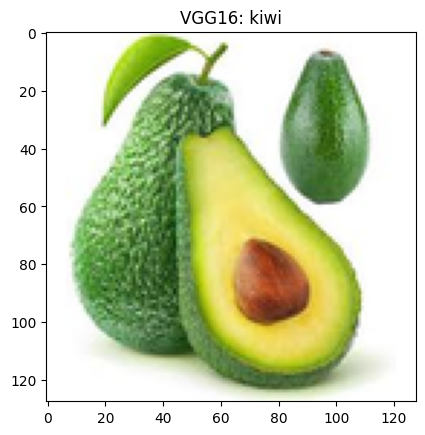

1/1 [==============================] - 0s 44ms/step
Image: 77.jpeg
VGG16 Prediction: strawberries



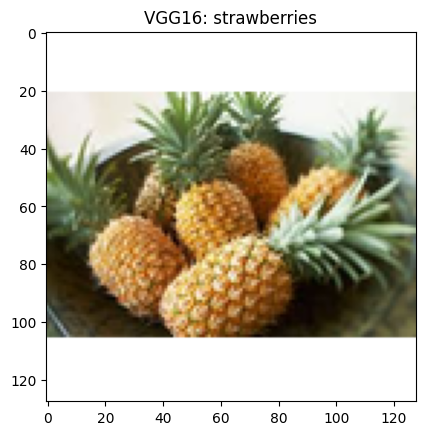

1/1 [==============================] - 0s 38ms/step
Image: img_191.jpeg
VGG16 Prediction: banana



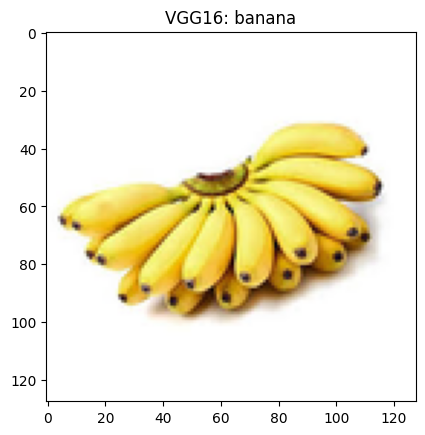

1/1 [==============================] - 0s 39ms/step
Image: 4.jpeg
VGG16 Prediction: watermelon



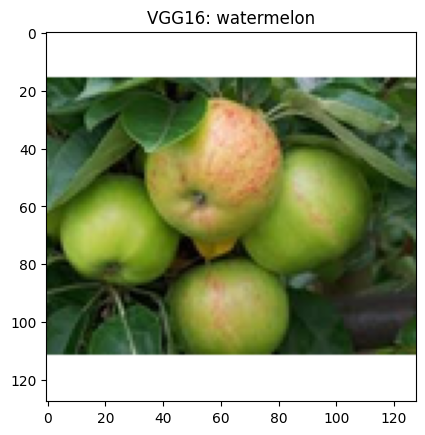

In [ ]:
import os
import numpy as np
from PIL import Image
from keras.models import load_model, Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import optimizers
from matplotlib import pyplot as plt

# Function to predict the class of an image using VGG16
def predict_image(classifier, image_array, classnames):
    img_features = image_array.astype('float32')
    img_features = preprocess_input(img_features)
    img_features = np.expand_dims(img_features, axis=0)
    predictions = classifier.predict(img_features)
    class_idx = np.argmax(predictions)
    return classnames[int(class_idx)]

# These are the classes our model can predict
classnames = ['avocado', 'kiwi', 'banana', 'cherry', 'apple', 'mango', 'orange', 'pineapple', 'strawberries', 'watermelon']

# Path to the folder with images to predict
predict_folder = '/content/drive/MyDrive/Colab Notebooks/Computer vision/MY_data/predict'
predict_image_files = [f for f in os.listdir(predict_folder) if os.path.isfile(os.path.join(predict_folder, f))]

# Predict and display results for each image
for file_idx in range(len(predict_image_files)):
    img_path = os.path.join(predict_folder, predict_image_files[file_idx])
    img = Image.open(img_path)

    # Resize the image so it matches the input shape of the model
    resized_img = np.array(resize_image(img))

    # Predict using VGG16 model
    vgg16_prediction = predict_image(model, resized_img, classnames)

    # Display the results
    print(f"Image: {predict_image_files[file_idx]}")
    print(f"VGG16 Prediction: {vgg16_prediction}")
    print()

    # Optionally, display the image
    plt.imshow(resized_img)
    plt.title(f"VGG16: {vgg16_prediction}")
    plt.show()

# Report

**What I have learnt deploying the CNN and transfering learning models**

### 1. Custom Neural Network vs. Transfer Learning Models

**Custom CNN:** This model was built from scratch with layers I defined, which included convolutional layers followed by max-pooling layers, and finally, dense layers for classification. The training and validation graphs showed steady improvement over epochs, but the model's performance was typically lower than that of the transfer learning models. This indicates that building effective deep learning models from scratch requires significant expertise and often more data and computational resources.

**VGG16 Transfer Learning:** By using a pre-trained VGG16 model and fine-tuning it for classification task, leveraged the powerful feature extraction capabilities of a model trained on a large dataset (ImageNet). This model showed higher accuracy and faster convergence than the custom CNN, highlighting the advantages of transfer learning, especially when dealing with limited data or computational resources.

**MobileNet Transfer Learning:** MobileNet is designed to be efficient and lightweight, suitable for mobile and edge devices. It also performed well on this dataset, balancing accuracy and computational efficiency. This model is particularly useful when deploying models in resource-constrained environments.

### 2. Training for More Epochs

The training process over multiple epochs allows the model to iteratively learn from the data and improve its performance. Here are the key observations:

**Improvement in Performance:** The training and validation accuracy graphs showed that extending the number of epochs generally led to better performance, as the model continued to learn and refine its understanding of the data. For instance, increasing the epochs from 5 to 15 led to noticeable improvements in validation accuracy for both the VGG16 and MobileNet models.

**Overfitting Risk:** While more epochs can enhance performance, they can also increase the risk of overfitting, where the model becomes too tailored to the training data and performs poorly on unseen data. This was observed in the slight divergence of training and validation losses in later epochs. Regular monitoring and early stopping techniques can help mitigate overfitting.

### 3. Importance of GPU for Training



Resource Limitations: Limited access to GPUs can be a bottleneck, as observed when you ran out of GPU time during training. This can be frustrating and requires careful planning of experiments to make the most efficient use of available resources.

### 4. Impact of Hyperparameters and Data Augmentation

Small adjustments to hyperparameters and data augmentation can lead to significant changes in model performance:

**Hyperparameters:** Experimenting with different hyperparameters such as learning rates, batch sizes, and the number of filters in convolutional layers showed varied effects on accuracy and training time. For example, lowering the learning rate often led to more stable but slower convergence, while increasing the number of filters improved feature extraction but also increased the computational load.

**Data Augmentation:** Techniques like rotation, zoom, and horizontal flipping helped increase the diversity of the training data, leading to improved model generalization. Data augmentation was crucial for your custom CNN, which had less inherent capability to generalize compared to pre-trained models like VGG16 and MobileNet.

### Next Steps
To further improve the models and gain deeper insights.

**Experiment with Different Architectures:** Explore other architectures like ResNet, Inception, or EfficientNet, which might provide better performance or efficiency for your task.

**Fine-tuning Techniques:** Adjust more layers of the pre-trained models during fine-tuning to see if it improves performance on your specific dataset.
Regularization Strategies: Implement dropout or L2 regularization to prevent overfitting, especially for longer training durations.
Hyperparameter Optimization: Use automated tools like grid search or Bayesian optimization to systematically explore and find the best hyperparameters for your models.

**Larger Datasets:** If possible, use larger and more diverse datasets to train and validate your models, which can enhance their robustness and generalization capabilities.